In [5]:
import os
import numpy as np
import pandas as pd
from glob import glob
import re
# import seaborn as sns
# sns.set()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from copy import deepcopy

def read_txt(fpath):
    with open(fpath, 'r') as fp:
        return fp.readlines()

rx_dict = {
    'candidate_num' : re.compile(r"Candidate: c(?P<candidate_num>\d)\n"),
    'concept' : re.compile(r"Concept: (?P<concept>.*)\n"),
    'candidate' : re.compile(r"Candidate Name: (?P<candidate>.*)\n"),
    'end' : re.compile(r"No discriminator found for puzzle (?P<cpath>.*)\n"),
    'bscores' : re.compile(r"The scores were (?P<score_list>\[[\d., e-]+\]).\n"),
    'bcandidate' : re.compile(r"Best concept is @ idx (\d) ie: (?P<bcpath>.*)\n")
}


def _parse_line(line):
    for key, rx in rx_dict.items():
        match = rx.search(line)
        if match:
            return (key, match)
    return (None, None)

def _parse_file(file_path):
    data = dict()
    data['name'] = str()
    data['concepts'] = list()
    data['baseline'] = dict()

    with open(file_path, 'r') as fp:
        line = fp.readline()

        concept = dict()
        while ('No discriminator found' not in line) and ('The scores were' not in line):                
            key, match = _parse_line(line)
            concept[key] = list(match.groups())[0]
            line = fp.readline()
            if line == "\n":
                line = fp.readline()
                data['concepts'].append(deepcopy(concept))
                concept = dict()
        
        if 'The scores were' not in line:        
            key, match = _parse_line(line)
            data['name'] = match.groups()[0]
            line = fp.readline()
        while line:
            key, match = _parse_line(line)
            if 'Best concept' in line:
                data['baseline'][key] = list(match.groups())[1]
                data['baseline']['bcandidate_num'] = list(match.groups())[0]
                
            line = fp.readline()
        
    return data
    
def read_txt(pth):
    with open(pth, 'r') as fp:
        return fp.readlines()

def to_txt(lines, pth):
    with open(pth, 'w') as fp:
        for l in lines:
            fp.write("%s" % l)



In [6]:
log_pattern = "/home/ubuntu/vdp-tool-chain-repo/data/clevr-variants/*-*[0-9].log"
out_pattern = "/home/ubuntu/vdp-tool-chain-repo/data/clevr-variants/*-*[0-9].out"

logs = glob(log_pattern)
outs = glob(out_pattern)


## Overall Statistics
1. Number of variants for each puzzle
1. Solver puzzle solutions: histogram
1. Baseline puzzle solutions: histogram
1. Solver puzzle solutions: breakdown by candidate chosen
1. Baseline puzzle solutions: breakdown by candidate chosen
1. Solver puzzle solutions: breakdown by puzzle 
1. Baseline puzzle solutions: breakdown by puzzle



In [4]:
print("## number of variants for each puzzle")
print(df.groupby(['name'])['variant'].count().reset_index().rename(columns={'name': 'puzzle', 'variant': 'number of variants'}).to_markdown())

## number of variants for each puzzle
|    | puzzle         |   number of variants |
|---:|:---------------|---------------------:|
|  0 | agreement      |                   42 |
|  1 | alternation    |                    7 |
|  2 | aphaeresis     |                   31 |
|  3 | apocope        |                   50 |
|  4 | assimilation   |                   42 |
|  5 | breaking       |                   48 |
|  6 | circle-at-ends |                    7 |
|  7 | devoicing      |                    7 |
|  8 | meeussen       |                   50 |
|  9 | shield         |                    7 |
| 10 | spy            |                    7 |
| 11 | surround       |                   43 |
| 12 | threepack      |                   18 |
| 13 | train          |                   50 |


In [6]:
intented = {
    'agreement' : "Sphere to left and right of all cylinders",
    'alternate-color' : "red cylinder to right of each green cylinder.",
    'alternation' : "sphere in front of each cylinder.",
    'aphaeresis' : "cylinder to the left of each cube",
    'apocope' : 'cylinder in front of each sphere',
    'assimilation' : 'cylinders have the same color as spheres',
    'breaking' : 'two spheres have the same color',
    'circle-at-ends' : 'two spheres are at either end of a line of objects.',
    'devoicing' : 'The rightmost object is a small cylinder',
    'spy' : 'A sphere must be accomponied by a cylinder of the same color.',
    'shield' : 'a cylinder has a metallic cube on its left of it.',
    'shield' : 'a cylinder has a metallic cube on its left of it.',
    'surround' : 'Large rubber cylinders have small rubber spheres on its left and right.',
    'threepack' : 'Three Cylinders in the image of the same color.',
    'meeussen' : 'One large sphere exists in the image.',
    'train' : 'Metallic cylinders are followed by rubber spheres.',
}


Text(0, 0.5, 'Percentage where target candidate is identified')

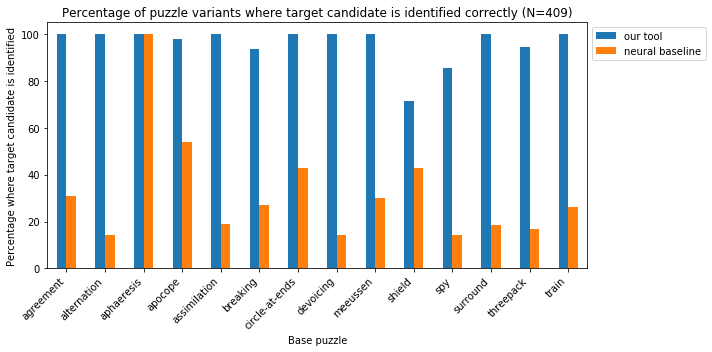

In [7]:
fig, ax = plt.subplots(1, 1, sharey=False, sharex=True, tight_layout=True, figsize=(10, 5))

plt.title(f"Percentage of puzzle variants where target candidate is identified correctly (N={df.shape[0]})")

(df.groupby(['name'])['solver', 'baseline'].mean() * 100).plot.bar(ax=ax)
# ax.grid(False)

# plt.axhline(y = 33.333, color = 'r', linestyle = 'dashed', label='random choice') 
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['our tool', 'neural baseline'], loc='center top', bbox_to_anchor=(1, 1))
plt.xlabel("Base puzzle")
plt.ylabel("Percentage where target candidate is identified")




Text(0, 0.5, 'Number of puzzle variants')

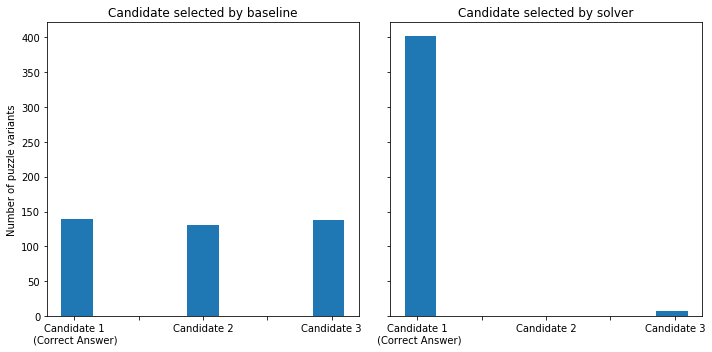

In [8]:

fig, ax = plt.subplots(1, 2, sharey=True, sharex=False, tight_layout=True, figsize=(10, 5))
ax[0].set_title("Candidate selected by baseline")
df['bcandidate'].hist(range=[-0.1, 2.1], bins=9, grid=False, ax=ax[0])
ax[1].set_title("Candidate selected by solver")
df['candidate'].hist(range=[-0.1, 2.1], bins=9, grid=False, ax=ax[1])

ax[0].set_xticklabels(["", "Candidate 1\n (Correct Answer)", "", "Candidate 2", "", "Candidate 3"])
ax[1].set_xticklabels(["", "Candidate 1\n (Correct Answer)", "", "Candidate 2", "", "Candidate 3"])
ax[0].set_ylabel("Number of puzzle variants")


In [9]:
print("## Baseline puzzle solutions: breakdown by candidate chosen")
print(df.groupby(['bcandidate'])['concept'].count().reset_index().rename(columns={'bcandidate':'candidate', 'concept' : 'count'}).set_index('candidate').to_markdown())


print("## Solver puzzle solutions: breakdown by candidate chosen")
print(df.groupby(['candidate'])['concept'].count().reset_index().rename(columns={'candidate':'candidate', 'concept' : 'count'}).set_index('candidate').to_markdown())

# print(df.groupby(['candidate'])['concept'].count())


## Baseline puzzle solutions: breakdown by candidate chosen
|   candidate |   count |
|------------:|--------:|
|           0 |     140 |
|           1 |     131 |
|           2 |     138 |
## Solver puzzle solutions: breakdown by candidate chosen
|   candidate |   count |
|------------:|--------:|
|           0 |     401 |
|           2 |       8 |


In [10]:
print("## Solver puzzle solutions: breakdown by puzzle")


# r = df.rename(columns={'name' : 'puzzle'}).groupby(['puzzle', 'candidate'])['concept'].count().unstack(1).fillna(0).reset_index()

# r['candidate 0 selected'] = r[0].astype(int)
# r['candidate 2 selected'] = r[2].astype(int)
# r['candidate 1 selected'] = 0
# pd.set_option('display.max_colwidth', -1)

# NUmber of variants / NUm varnaits solved correctly / number of varinats solved baseline / descriminator
# (r[['puzzle', 'description', 'candidate 0 selected', 'candidate 1 selected', 'candidate 2 selected']].set_index(['puzzle']))

results = df[['concept', 'name', 'solver', 'baseline', 'variant']]
results['description'] = results['name'].map(intented)

nvariants = results.groupby(['name', 'description'])['variant'].count().astype(int).reset_index().rename(columns={'variant':'number of variants'})

nvariants_correct = results.groupby(['name', 'description'])[['solver']].sum().astype(int).rename(columns={'solver':'Variants solved correctly (ours)'}).reset_index()



nvariants.merge(nvariants_correct, how='outer').set_index('name')




## Solver puzzle solutions: breakdown by puzzle


,description,number of variants,Variants solved correctly (ours)
name,,,
agreement,Sphere to left and right of all cylinders,42,42
alternation,sphere in front of each cylinder.,7,7
aphaeresis,cylinder to the left of each cube,31,31
apocope,cylinder in front of each sphere,50,49
assimilation,cylinders have the same color as spheres,42,42
breaking,two spheres have the same color,48,45
circle-at-ends,two spheres are at either end of a line of obj...,7,7
devoicing,The rightmost object is a small cylinder,7,7
meeussen,One large sphere exists in the image.,50,50


In [11]:
print(nvariants.merge(nvariants_correct, how='outer').set_index('name').to_latex())


\begin{tabular}{llrr}
\toprule
{} &                                        description &  number of variants &  Variants solved correctly (ours) \\
name           &                                                    &                     &                                   \\
\midrule
agreement      &          Sphere to left and right of all cylinders &                  42 &                                42 \\
alternation    &                  sphere in front of each cylinder. &                   7 &                                 7 \\
aphaeresis     &                  cylinder to the left of each cube &                  31 &                                31 \\
apocope        &                   cylinder in front of each sphere &                  50 &                                49 \\
assimilation   &           cylinders have the same color as spheres &                  42 &                                42 \\
breaking       &                    two spheres have the same color &

In [12]:
print("## Baseline puzzle solutions: breakdown by puzzle")
print(df.rename(columns={'name' : 'puzzle'}).groupby(['puzzle', 'bcandidate'])['concept'].count().unstack(1).fillna(0).to_markdown())

## Baseline puzzle solutions: breakdown by puzzle
| puzzle         |   0 |   1 |   2 |
|:---------------|----:|----:|----:|
| agreement      |  13 |  21 |   8 |
| alternation    |   1 |   1 |   5 |
| aphaeresis     |  31 |   0 |   0 |
| apocope        |  27 |  10 |  13 |
| assimilation   |   8 |   8 |  26 |
| breaking       |  13 |  18 |  17 |
| circle-at-ends |   3 |   2 |   2 |
| devoicing      |   1 |   5 |   1 |
| meeussen       |  15 |  12 |  23 |
| shield         |   3 |   2 |   2 |
| spy            |   1 |   5 |   1 |
| surround       |   8 |  19 |  16 |
| threepack      |   3 |   5 |  10 |
| train          |  13 |  23 |  14 |


In [13]:

def viz(puzzle, output_path):
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg
        import matplotlib.patches as patches
        import matplotlib.gridspec as gridspec

        output = (f"/home/ubuntu/vdp-tool-chain-repo/data/clevr-variants/{puzzle}.out")
        images = sorted(glob(f"/home/ubuntu/vdp-tool-chain-repo/data/output/images/{puzzle}/*"), key= lambda x: os.path.basename(x))
        output = _parse_file(output)

        name = os.path.basename(output['name'])[:-1]
        concept0 = output['concepts'][0]['concept']
        candidate0 = os.path.basename(output['concepts'][0]['candidate']).split(".")[0]
        bcandidate = output['baseline']['bcandidate_num']
        concept0 = re.sub("(.{64})", r"\1\n\t", concept0, 0, re.DOTALL)

        fig = plt.figure(constrained_layout=False, figsize=(int(12.5*1.5), int(12.5*1.5)))
        # gs1 = fig.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.4, bottom=0.35,
                                # wspace=0.05)
        gs1 = fig.add_gridspec(nrows=2, ncols=2, left=0.45, right=0.98, bottom=0.35,
                                wspace=0.05)
                                
        # gs2 = fig.add_gridspec(nrows=3, ncols=1, left=0.2, right=0.98,
        #                         hspace=0.25)
        gs2 = fig.add_gridspec(nrows=3, ncols=1, left=0.02, right=0.40,
                                hspace=0.25, wspace=0.5)

        gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.45, right=0.98, top=0.3,
                                hspace=0.25)


        ax0 = fig.add_subplot(gs3[:, :])
        ax0.title.set_text('Results')

        ax1 = fig.add_subplot(gs1[:-1, :])
        ax1.title.set_text('Candidate Image 1 (Answer)')
        ax1.imshow(mpimg.imread(images[0]))

        ax2 = fig.add_subplot(gs1[-1, :-1])
        ax2.title.set_text('Candidate Image 2')
        ax2.imshow(mpimg.imread(images[1]))

        ax3 = fig.add_subplot(gs1[-1, -1])
        ax3.title.set_text('Candidate Image 3')
        ax3.imshow(mpimg.imread(images[2]))
        ax4 = fig.add_subplot(gs2[0, :])
        ax4.title.set_text('Train Image 1')
        ax4.imshow(mpimg.imread(images[3]))

        ax5 = fig.add_subplot(gs2[1, :])
        ax5.title.set_text('Train Image 2')
        ax5.imshow(mpimg.imread(images[4]))

        ax6 = fig.add_subplot(gs2[2, :])
        ax6.title.set_text('Train Image 3')
        ax6.imshow(mpimg.imread(images[5]))

        ax0.axis('off')
        ax1.axis('off')
        ax2.axis('off')
        ax3.axis('off')
        ax4.axis('off')
        ax5.axis('off')
        ax6.axis('off')

        txtargs = {"transform" : ax0.transAxes, "fontsize" : 12, "verticalalignment" : 'top', "horizontalalignment" : 'left'}

        # place a text box in upper left in axes coords
        name_text = f"""Puzzle Name: {name}
        Puzzle Description: There are two spheres in a line with the same color
        Solver Selected Candidate: Candidate {int(candidate0) + 1}
        Baseline Selected Candidate: Candidate {int(bcandidate) + 1}
        Solver identified concept:\n\t{concept0}""".expandtabs()



        ax0.text(0.05, 0.9, name_text, **txtargs)
        plt.savefig(output_path)
    except Exception as e:
        print(e)
        print(puzzle)


In [ ]:
for p in map(lambda x: os.path.basename(x).split(".")[0] , outs):
    out_path = os.path.join("/home/ubuntu/vdp-tool-chain-repo/data/vizs", p + ".png")
    viz(p, out_path)

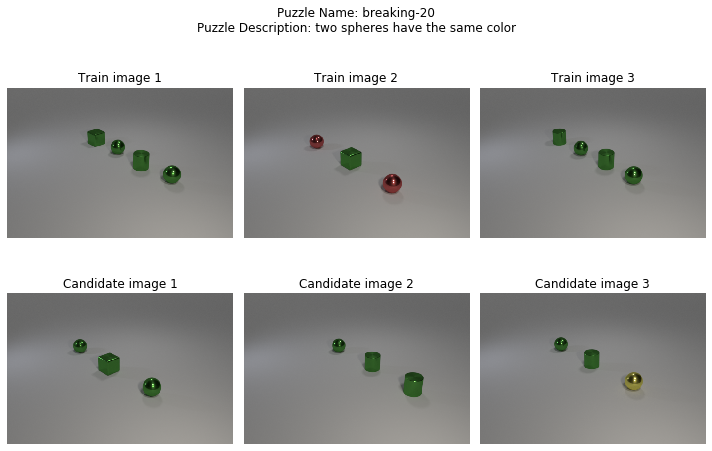

In [17]:
name = os.path.basename(outs[10]).split(".")[0]
images = sorted(glob(os.path.join("output", "images",name, "*")))


fig, ax = plt.subplots(2, 3, tight_layout=True, figsize=(10, 7.5))
plt.suptitle(f"Puzzle Name: {name}\nPuzzle Description: {intented[name.split('-')[0]]}")


test_images = images[:3]
train_images = images[3:]

for col, img in enumerate(train_images):
        ax[0][col].imshow(mpimg.imread(img))
        ax[0][col].set_title(f"Train image {col + 1}")
        ax[0][col].axis('off')
for col, img in enumerate(test_images):
        ax[1][col].imshow(mpimg.imread(img))
        ax[1][col].set_title(f"Candidate image {col + 1}")
        ax[1][col].axis('off')


# ax[0].set_title("Candidate selected by baseline")
# df['bcandidate'].hist(range=[-0.1, 2.1], bins=9, grid=False, ax=ax[0])
# ax[1].set_title("Candidate selected by solver")
# df['candidate'].hist(range=[-0.1, 2.1], bins=9, grid=False, ax=ax[1])

# ax[0].set_xticklabels(["", "Candidate 1\n (Correct Answer)", "", "Candidate 2", "", "Candidate 3"])
# ax[1].set_xticklabels(["", "Candidate 1\n (Correct Answer)", "", "Candidate 2", "", "Candidate 3"])
# ax[0].set_ylabel("Number of puzzle variants")
